In [2]:
import pandas as pd
import numpy as np
import nltk
import re #Regular expressions
import matplotlib.pyplot as plt
import seaborn as sns #Plotting properties
# from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer #Data transformation
from sklearn.linear_model import LogisticRegression #Prediction Model
from sklearn.metrics import accuracy_score #Comparison between real and predicted
from nltk import word_tokenize
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# to generate word cloud
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


In [3]:
# Load the dataset
df_train = pd.read_csv('twitter_training.csv') 
df_val = pd.read_csv('twitter_validation.csv')



# Explore the data
df_train.head()
df_val.head()

,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


In [4]:
df_train.columns=['id', 'Topic', 'Impression', 'Text']
df_train.head()

,id,Topic,Impression,Text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [5]:
df_val.columns=['id', 'Topic', 'Impression', 'Text']
df_val.head()

,id,Topic,Impression,Text
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


In [6]:
#Text transformation
#def remove_single_double_letters(text):
    # Define a regular expression pattern to match single and double letters
    #pattern = r'\b[a-zA-Z]{1,2}\b'  # Matches words with 1 or 2 alphabetic characters
    
    # Use re.sub() to replace matched patterns with an empty string
    #cleaned_text = re.sub(pattern, '', text)
    
    #return cleaned_text

df_train["lower"]=df_train.Text.str.lower() #lowercase
df_train["lower"]=[str(data) for data in df_train.lower] #converting all to string
df_train["lower"]=df_train.lower.apply(lambda x: re.sub('[^A-Za-z0-9 ]+', ' ', x)) #regex
#df_train['lower'] = df_train['lower'].apply(remove_single_double_letters)
df_val["lower"]=df_val.Text.str.lower() #lowercase
df_val["lower"]=[str(data) for data in df_val.lower] #converting all to string
df_val["lower"]=df_val.lower.apply(lambda x: re.sub('[^A-Za-z0-9 ]+', ' ', x)) #regex
#df_val['lower'] = df_val['lower'].apply(remove_single_double_letters)


In [7]:
df_val.head()

,id,Topic,Impression,Text,lower
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...,bbc news amazon boss jeff bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...,microsoft why do i pay for word when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,...",csgo matchmaking is so full of closet hacking ...
3,4433,Google,Neutral,Now the President is slapping Americans in the...,now the president is slapping americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...,hi eahelp i ve had madeleine mccann in my cel...


In [8]:
df_train.head()

,id,Topic,Impression,Text,lower
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,i am coming to the borders and i will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...,im getting into borderlands and i can murder y...


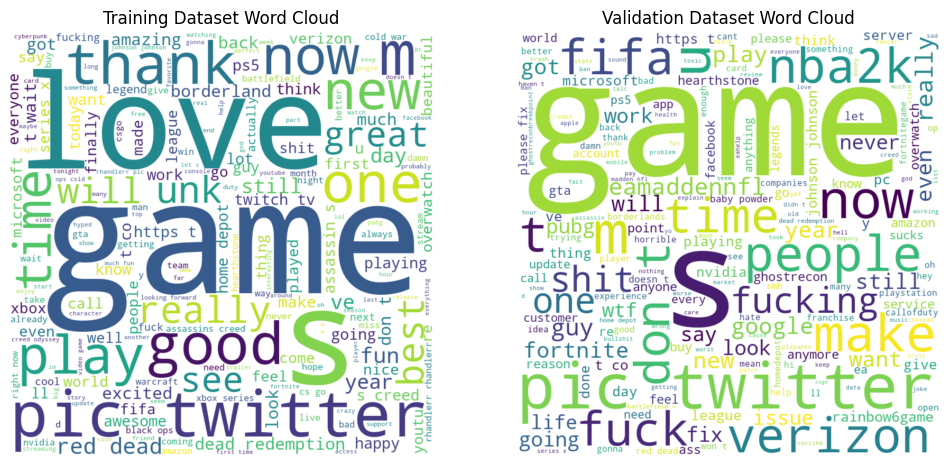

In [9]:
# Create a word cloud for the training dataset
train_text = ' '.join(df_train[df_train["Impression"]=="Positive"].lower)
wordcloud_train = WordCloud(width=800, height=800, background_color='white').generate(train_text)

# Create a word cloud for the validation dataset
valid_text = ' '.join(df_val[df_val["Impression"]=="Negative"].lower)
wordcloud_valid = WordCloud(width=800, height=800, background_color='white').generate(valid_text)

# Plot the word clouds
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_train, interpolation='bilinear')
plt.title('Training Dataset Word Cloud')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_valid, interpolation='bilinear')
plt.title('Validation Dataset Word Cloud')
plt.axis('off')

plt.show()

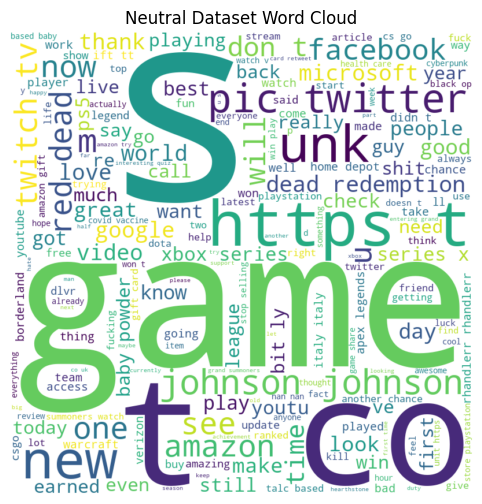

In [10]:
# Create a word cloud for neutral dataset
train_text = ' '.join(df_train[df_train["Impression"]=="Neutral"].lower)
wordcloud_train = WordCloud(width=800, height=800, background_color='white').generate(train_text)

plt.figure(figsize= (12, 6))
plt.imshow(wordcloud_train, interpolation='bilinear')
plt.title('Neutral Dataset Word Cloud')
plt.axis('off')

plt.show()

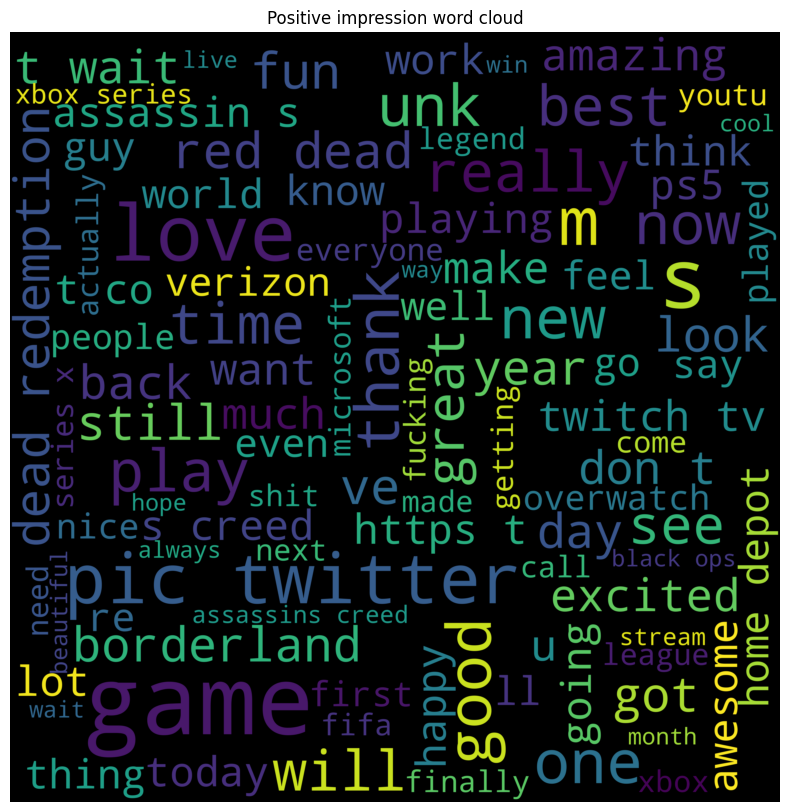

In [11]:
word_cloud_text = ''.join(df_train[df_train["Impression"]=="Positive"].lower)
#Creation of wordcloud
wordcloud = WordCloud(
    max_font_size=100,
    max_words=100,
    background_color="black",
    scale=10,
    width=800,
    height=800
).generate(word_cloud_text)
#Figure properties
plt.figure(figsize=(10,10))
plt.title('Positive impression word cloud')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

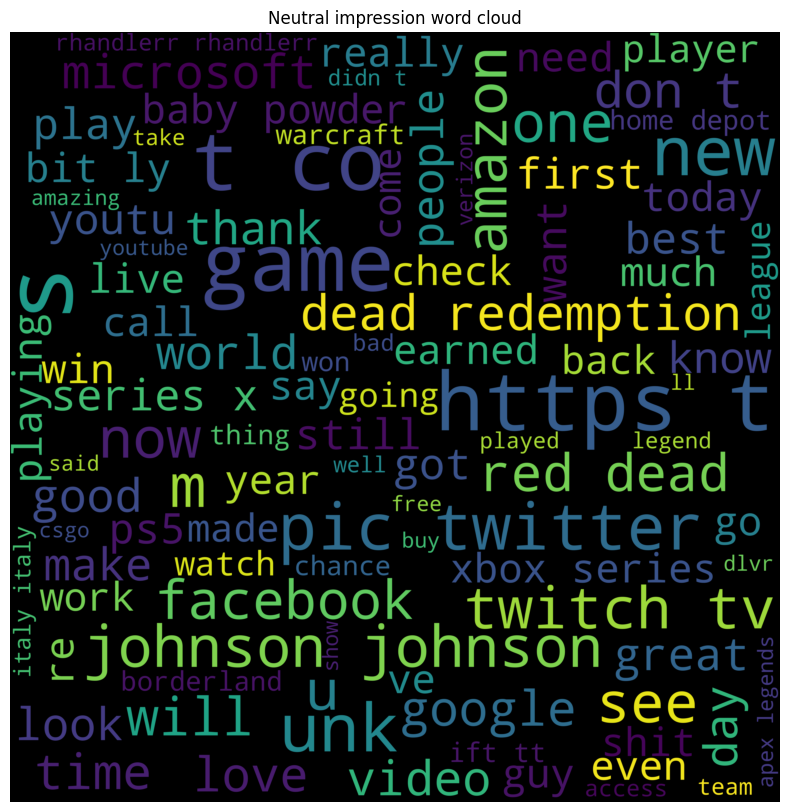

In [12]:
word_cloud_text = ''.join(df_train[df_train["Impression"]=="Neutral"].lower)
#Creation of wordcloud
wordcloud = WordCloud(
    max_font_size=100,
    max_words=100,
    background_color="black",
    scale=10,
    width=800,
    height=800
).generate(word_cloud_text)
#Figure properties
plt.figure(figsize=(10,10))
plt.title('Neutral impression word cloud')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

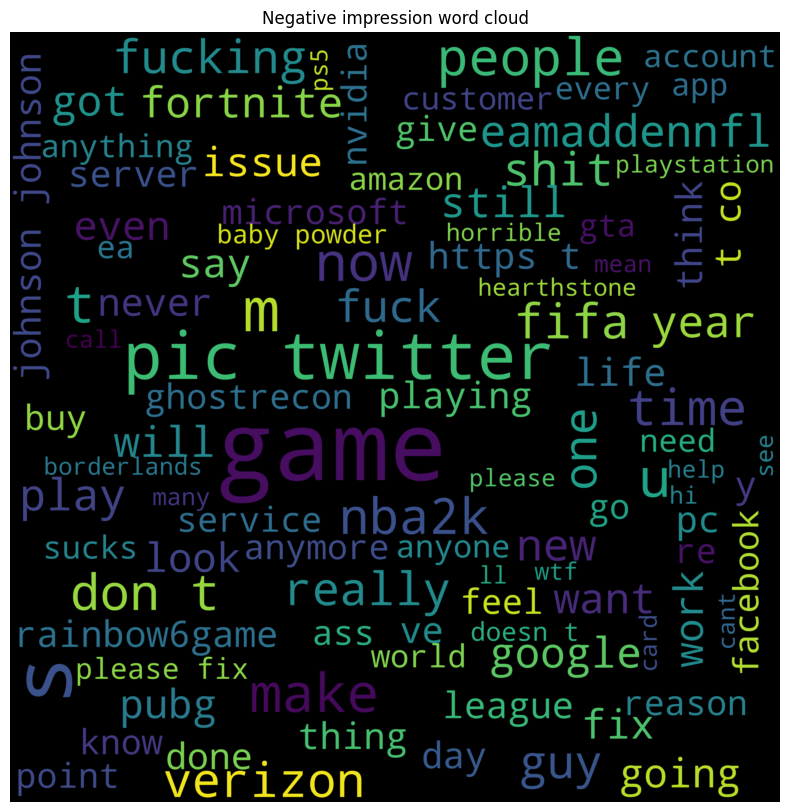

In [13]:
word_cloud_text = ''.join(df_val[df_val["Impression"]=="Negative"].lower)
#Creation of wordcloud
wordcloud = WordCloud(
    max_font_size=100,
    max_words=100,
    background_color="black",
    scale=10,
    width=800,
    height=800
).generate(word_cloud_text)
#Figure properties
plt.figure(figsize=(10,10))
plt.title('Negative impression word cloud')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [14]:
df_train.info() 
df_train.isnull().sum() #check for columns with no data
df_val.isnull().sum() #check for columns with no data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          74681 non-null  int64 
 1   Topic       74681 non-null  object
 2   Impression  74681 non-null  object
 3   Text        73995 non-null  object
 4   lower       74681 non-null  object
dtypes: int64(1), object(4)
memory usage: 2.8+ MB


id            0
Topic         0
Impression    0
Text          0
lower         0
dtype: int64

In [15]:
df_train.isnull().sum() #after no text samples are dropped

id              0
Topic           0
Impression      0
Text          686
lower           0
dtype: int64

In [16]:
#Count topic per category
plot1=df_train.groupby(by=["Topic","Impression"]).count().reset_index()
plot1.head()

#After no text samples are dropped, data is unified as the id matches the unified text. shows ID is unique

,Topic,Impression,id,Text,lower
0,Amazon,Irrelevant,192,186,192
1,Amazon,Negative,576,575,576
2,Amazon,Neutral,1236,1207,1236
3,Amazon,Positive,312,308,312
4,ApexLegends,Irrelevant,192,192,192


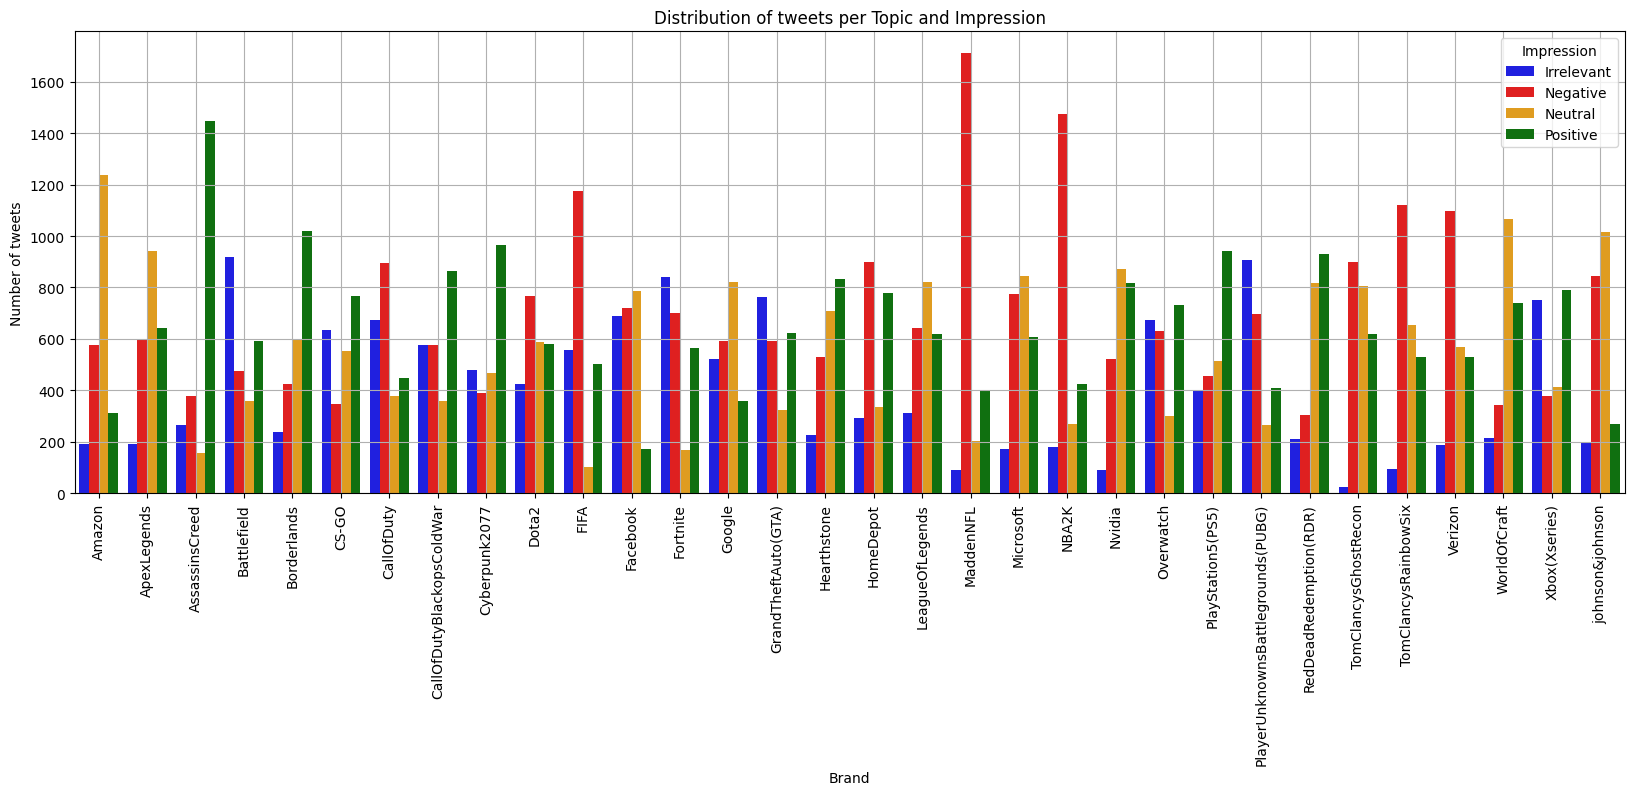

In [17]:
# Chart showing different topics and their impressions 
# Define a custom color palette for impressions
impression_colors = {"Positive": "green", "Negative": "red", "Irrelevant" : "blue", "Neutral":"orange"}

plt.figure(figsize=(20,6))
sns.barplot(data=plot1,x="Topic",y="id",hue="Impression", palette = impression_colors)
plt.xticks(rotation=90)
plt.xlabel("Brand")
plt.ylabel("Number of tweets")
plt.grid()
plt.title("Distribution of tweets per Topic and Impression");
# we can see at a glance that the topics with the highest negative impressions are maddennfl and nba2k

In [18]:
df_train.columns

Index(['id', 'Topic', 'Impression', 'Text', 'lower'], dtype='object')

In [19]:
# Tokenize each text element in the 'train_data' DataFrame
tokens_text = [ word_tokenize(text.upper()) for text in df_train['lower']]  # Replace 'column_name' with the actual column containing text data

# Flatten the list of tokens
tokens_flat = [item for sublist in tokens_text for item in sublist]

# Count the number of unique tokens (words)
unique_word_count = len(set(tokens_flat))

#print("Number of tokens: ", len(tokens_flat))
print("Number of unique words: ", unique_word_count)


Number of unique words:  30436


In [20]:
tokens_text[1]

['IM',
 'GETTING',
 'ON',
 'BORDERLANDS',
 'AND',
 'I',
 'WILL',
 'KILL',
 'YOU',
 'ALL']

In [21]:
#Choosing english stopwords cos dataset is in english
stopwords_nltk = nltk.corpus.stopwords
stop_words = stopwords_nltk.words('english')
stop_words[:5]

['i', 'me', 'my', 'myself', 'we']

In [22]:
#logistic regression model with bag of words approach
#Initial Bag of Words
bow_counts = CountVectorizer(
    tokenizer=word_tokenize,
    stop_words=stop_words, #English Stopwords
    ngram_range=(1, 1) #analysis of one word
)

In [23]:
#Train - Test splitting
reviews_train, reviews_test = train_test_split(df_train, test_size=0.2, random_state=0)

In [24]:
reviews_train

,id,Topic,Impression,Text,lower
27749,1179,AssassinsCreed,Positive,I genuinely wish more companies would do this ...,i genuinely wish more companies would do this ...
22415,4237,CS-GO,Neutral,today i carried my whole team in @PlayVALORANT...,today i carried my whole team in playvalorant...
44208,10395,PlayerUnknownsBattlegrounds(PUBG),Positive,"Good news!, pubg will unban in India.. pic.twi...",good news pubg will unban in india pic twitt...
71736,11089,TomClancysGhostRecon,Negative,@ GhostRecon _ UK cannot be played because no ...,ghostrecon uk cannot be played because no ...
41144,1461,Battlefield,Neutral,The Russian systems are becoming Battlefield 1,the russian systems are becoming battlefield 1
...,...,...,...,...,...
21243,4037,CS-GO,Positive,Help give me someday win through this awesome ...,help give me someday win through this awesome ...
45891,11877,Verizon,Neutral,This comes as Facebook currently faces major p...,this comes as facebook currently faces major p...
42613,10111,PlayerUnknownsBattlegrounds(PUBG),Irrelevant,@ PUBGMOE (my game ID is 5176547049 and ORCpre...,pubgmoe my game id is 5176547049 and orcpre...
43567,10279,PlayerUnknownsBattlegrounds(PUBG),Irrelevant,"I've just finished my second YouTube video, I ...",i ve just finished my second youtube video i ...


In [25]:
#Creation of encoding related to train dataset
X_train_bow = bow_counts.fit_transform(reviews_train.lower)

#Transformation of test dataset with train encoding
X_test_bow = bow_counts.transform(reviews_test.lower)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.
  % sorted(inconsistent)


In [26]:
#Labels for train and test encoding
y_train_bow = reviews_train['Impression']
y_test_bow = reviews_test['Impression']

In [27]:
#Total of registers per category
y_test_bow.value_counts() / y_test_bow.shape[0]

Negative      0.301399
Positive      0.281717
Neutral       0.244895
Irrelevant    0.171989
Name: Impression, dtype: float64

In [28]:
# Logistic regression
model1 = LogisticRegression(C=1, solver="liblinear",max_iter=200)
model1.fit(X_train_bow, y_train_bow)
# Prediction
test_pred = model1.predict(X_test_bow)
print("Accuracy: ", accuracy_score(y_test_bow, test_pred) * 100)

Accuracy:  83.32329115618933


In [29]:
#Validation data
X_val_bow = bow_counts.transform(df_val.lower)
y_val_bow = df_val['Impression']
X_val_bow

<999x29032 sparse matrix of type '<class 'numpy.int64'>'
	with 12893 stored elements in Compressed Sparse Row format>

In [30]:
Val_res = model1.predict(X_val_bow)
print("Accuracy: ", accuracy_score(y_val_bow, Val_res) * 100)

Accuracy:  93.1931931931932


In [31]:
#n-gram of 4 words
bow_counts = CountVectorizer(
    tokenizer=word_tokenize,
    ngram_range=(1,4)
)
#Data labeling
X_train_bow = bow_counts.fit_transform(reviews_train.lower)
X_test_bow = bow_counts.transform(reviews_test.lower)
X_val_bow = bow_counts.transform(df_val.lower)
X_train_bow

<59744x1428316 sparse matrix of type '<class 'numpy.int64'>'
	with 4142525 stored elements in Compressed Sparse Row format>

In [41]:
model2 = LogisticRegression(C=1, solver="liblinear",max_iter=1000)
# Logistic regression
model2.fit(X_train_bow, y_train_bow)
# Prediction
test_pred_2 = model2.predict(X_test_bow)
print("Accuracy: ", accuracy_score(y_test_bow, test_pred_2) * 100)

Accuracy:  91.05576755707304


In [33]:
y_val_bow = df_val['Impression']
Val_pred_2 = model2.predict(X_val_bow)
print("Accuracy: ", accuracy_score(y_val_bow, Val_pred_2) * 100)

Accuracy:  98.8988988988989


In [34]:
tokens_text[1]

['IM',
 'GETTING',
 'ON',
 'BORDERLANDS',
 'AND',
 'I',
 'WILL',
 'KILL',
 'YOU',
 'ALL']

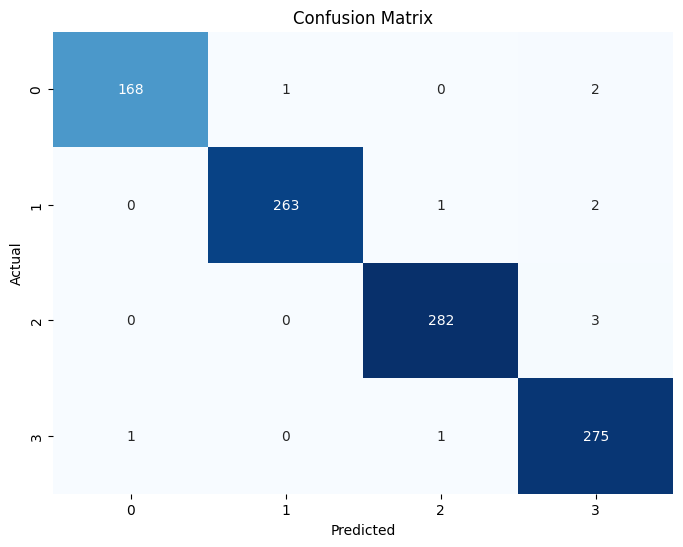

In [35]:
conf_matrix = confusion_matrix(y_val_bow, Val_pred_2)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


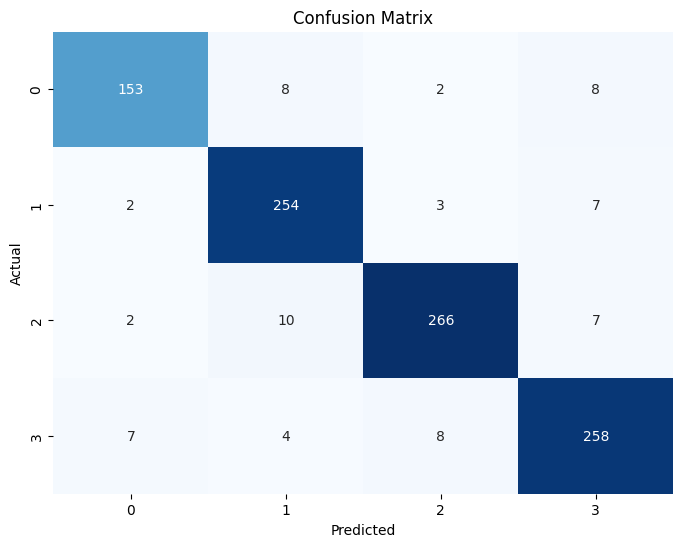

In [36]:
conf_matrix = confusion_matrix(y_val_bow, Val_res)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [37]:
new_text = ["I loved the product", "The service was terrible", "not there"]

X_val_bow = bow_counts.transform(pd.Series(new_text).str.lower())

new_pred = model2.predict(X_val_bow)

new_pred

array(['Positive', 'Negative', 'Negative'], dtype=object)